In [1]:
# Part One: Understanding the Background and Data

In [2]:
# Importing The Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading The File

fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
# Understanding The Data

fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

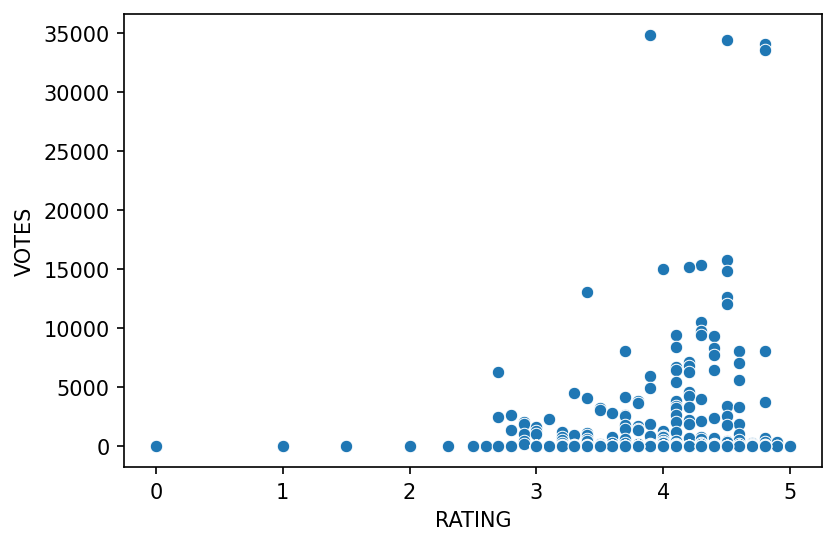

In [6]:
# Exploring the relationship between popularity of a film and its rating

plt.figure(dpi=150)
sns.scatterplot(data=fandango, x="RATING", y="VOTES")

In [7]:
# Checking The Correlation

fandango.corr()

C:\Users\Dhruv Khanna\AppData\Local\Temp\ipykernel_14652\994531850.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


C:\Users\Dhruv Khanna\AppData\Local\Temp\ipykernel_14652\3552125959.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fandango.corr(), cmap = "viridis", linewidth = 1, annot = True)


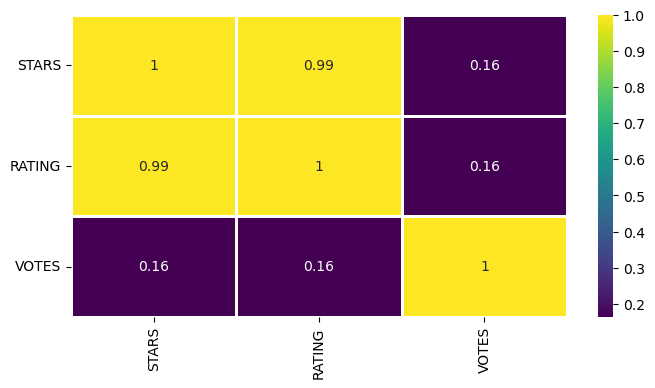

In [8]:
# Visualize the correlation
plt.figure(figsize = (8,4), dpi = 100)
sns.heatmap(fandango.corr(), cmap = "viridis", linewidth = 1, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [9]:
zero_votes = fandango["VOTES"]==0
zero_votes.value_counts()

False    435
True      69
Name: VOTES, dtype: int64

In [10]:
#Creating a new table having only Votes>0

New_fandango = fandango[fandango["VOTES"]>0]

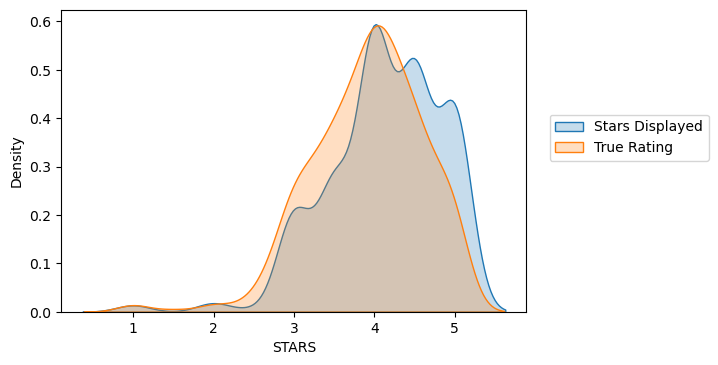

In [11]:
# Visualising the Difference between the STARS Displayed vs The Actual RATING

plt.figure(dpi=100)
sns.kdeplot(data=New_fandango, x="STARS",fill= "green",label='Stars Displayed' )
sns.kdeplot(data=New_fandango, x="RATING", fill = "red",label='True Rating')
plt.legend(loc=(1.05,0.5))

In [12]:
# New column of the different between STARS displayed versus true RATING

New_fandango["STAR DIFFERENCE"] = New_fandango["STARS"] - New_fandango["RATING"]
New_fandango["STAR DIFFERENCE"]  = New_fandango["STAR DIFFERENCE"].round(2) 

C:\Users\Dhruv Khanna\AppData\Local\Temp\ipykernel_14652\3384282950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_fandango["STAR DIFFERENCE"] = New_fandango["STARS"] - New_fandango["RATING"]
C:\Users\Dhruv Khanna\AppData\Local\Temp\ipykernel_14652\3384282950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_fandango["STAR DIFFERENCE"]  = New_fandango["STAR DIFFERENCE"].round(2)


<AxesSubplot:xlabel='STAR DIFFERENCE', ylabel='count'>

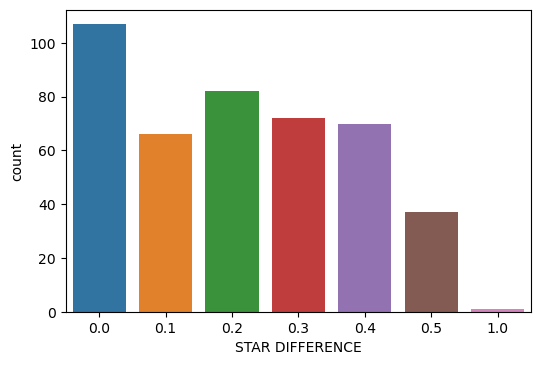

In [13]:
# Visualising the Difference 

plt.figure(dpi=100)
sns.countplot(data=New_fandango, x="STAR DIFFERENCE" )

In [14]:
# Comparig with other Websites

In [15]:
# Reading the File

all_sites = pd.read_csv("all_sites_scores.csv")

In [16]:
# Understanding the Data 

all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [17]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [18]:
# Merging the 2 Tables together with Inner Join

New_Merge=fandango.merge(all_sites, how='inner', on='FILM')
New_Merge.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252


In [19]:
# Creating a Normalised Rating Table for the different websites

New_Merge["MT_Norm"] = New_Merge["Metacritic"]/20 
New_Merge["MT_Norm"] = New_Merge["MT_Norm"].round(1)
New_Merge["MTU_Norm"] = New_Merge["Metacritic_User"]/2 
New_Merge["MTU_Norm"] = New_Merge["MTU_Norm"].round(1)
New_Merge["RTU_Norm"] = New_Merge["RottenTomatoes_User"]/20
New_Merge["RTU_Norm"] = New_Merge["RTU_Norm"].round(1)
New_Merge["RT_Norm"] = New_Merge["RottenTomatoes"]/20
New_Merge["RT_Norm"] = New_Merge["RT_Norm"].round(1)
New_Merge['IMDB_Norm'] = np.round(New_Merge['IMDB']/2,1)
New_Merge


,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,MT_Norm,MTU_Norm,RTU_Norm,RT_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,2.3,1.6,2.1,1.2,2.1
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,3.0,3.5,4.0,3.6,3.6
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,3.6,3.3,4.2,3.6,3.7
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,3.4,3.4,4.2,4.0,3.7
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,4.7,4.4,4.5,4.9,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,87,63,68,6.4,6.7,19,5289,3.4,3.2,3.2,4.4,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,95,81,87,6.3,7.0,18,1107,4.4,3.2,4.0,4.8,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,93,84,67,7.0,7.8,4,732,3.4,3.5,4.2,4.6,3.9
143,Tangerine (2015),4.0,3.9,36,95,86,86,7.3,7.4,14,696,4.3,3.6,4.3,4.8,3.7


In [20]:
# Normalised Scores Table

Norm_scores = New_Merge[['STARS',"RATING","MT_Norm","MTU_Norm","RTU_Norm","RT_Norm","IMDB_Norm"]]

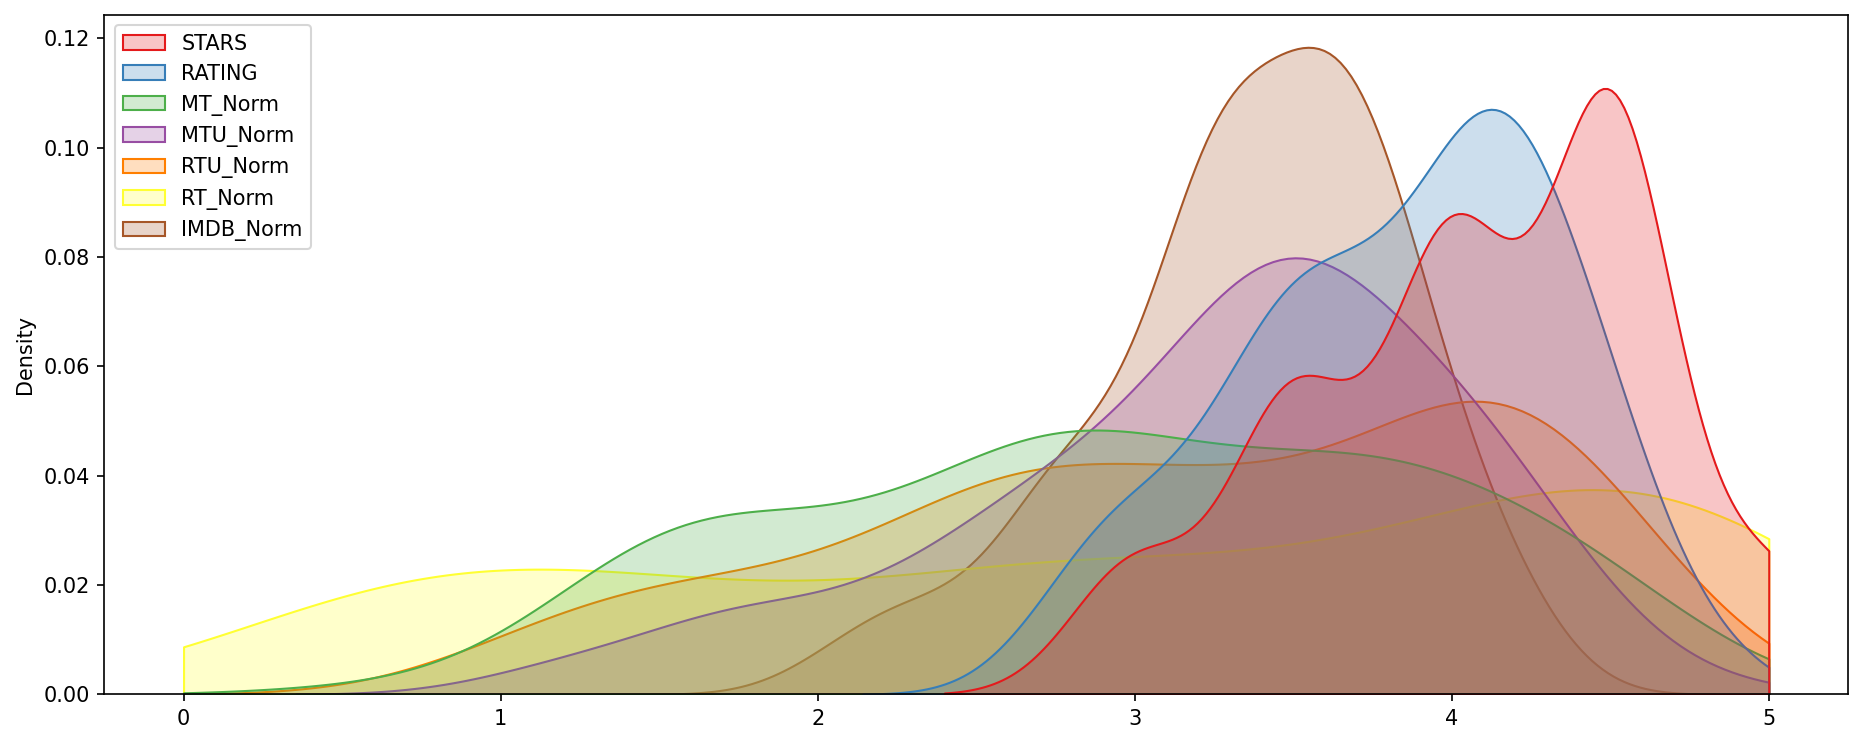

In [21]:
# Plotting The Normalised Plot For all the websites
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=Norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

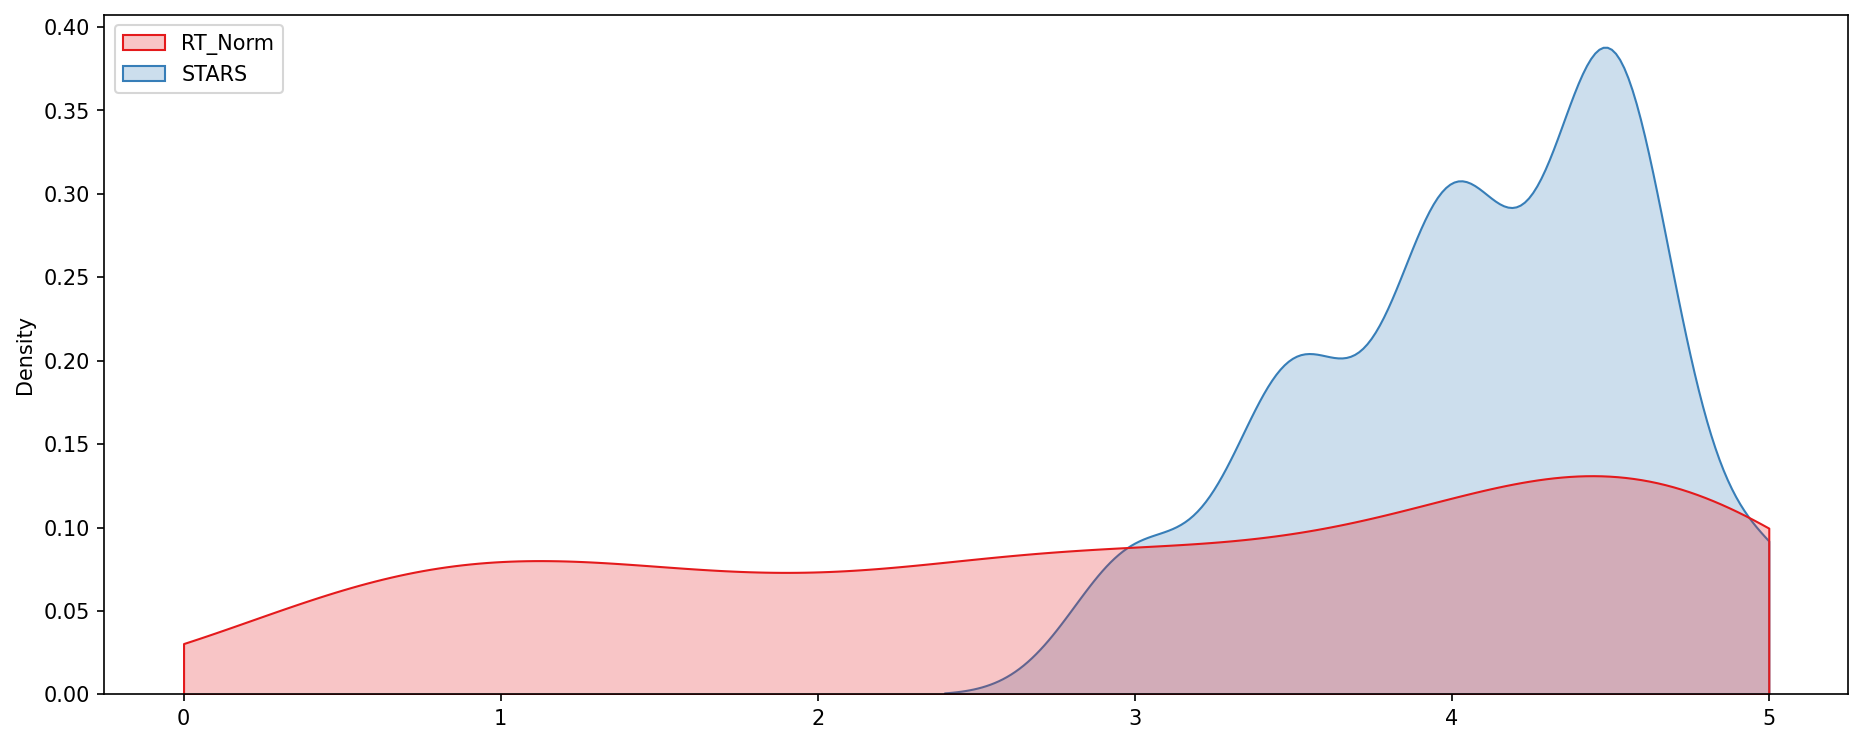

In [22]:
#  The distribution of RottenTomato critic ratings against the STARS displayed by Fandango

fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=Norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

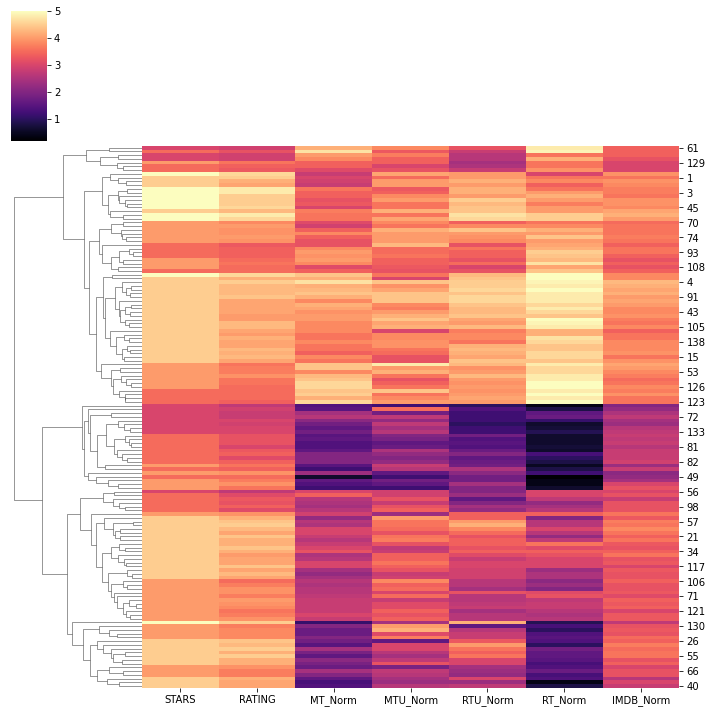

In [23]:
# Clustermap visualization of all normalized scores 
sns.clustermap(Norm_scores,cmap='magma',col_cluster=False)

In [24]:
# Visualising How FAndango Rated the lowst Rated Movies Agaisnst other websites 

Norm_Film = New_Merge[['STARS',"RATING","MT_Norm","MTU_Norm","RTU_Norm","RT_Norm","IMDB_Norm", "FILM"]]
Norm_Film.nsmallest(10,"RT_Norm")

,STARS,RATING,MT_Norm,MTU_Norm,RTU_Norm,RT_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.6,1.2,1.8,0.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,1.3,2.3,2.3,0.4,3.0,Taken 3 (2015)
28,3.0,2.7,1.4,1.2,1.0,0.4,2.0,Fantastic Four (2015)
54,4.0,3.7,1.6,1.8,1.8,0.4,2.4,Hot Pursuit (2015)
84,4.0,3.9,1.4,1.6,2.4,0.4,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,1.5,2.8,1.8,0.5,2.3,The Boy Next Door (2015)
77,3.5,3.2,1.5,2.0,1.8,0.6,2.8,Seventh Son (2015)
78,3.5,3.2,1.4,1.6,1.5,0.6,2.8,Mortdecai (2015)
83,3.5,3.3,1.6,2.5,1.7,0.6,2.8,Sinister 2 (2015)
87,3.5,3.2,1.6,1.9,1.4,0.6,2.7,Unfinished Business (2015)


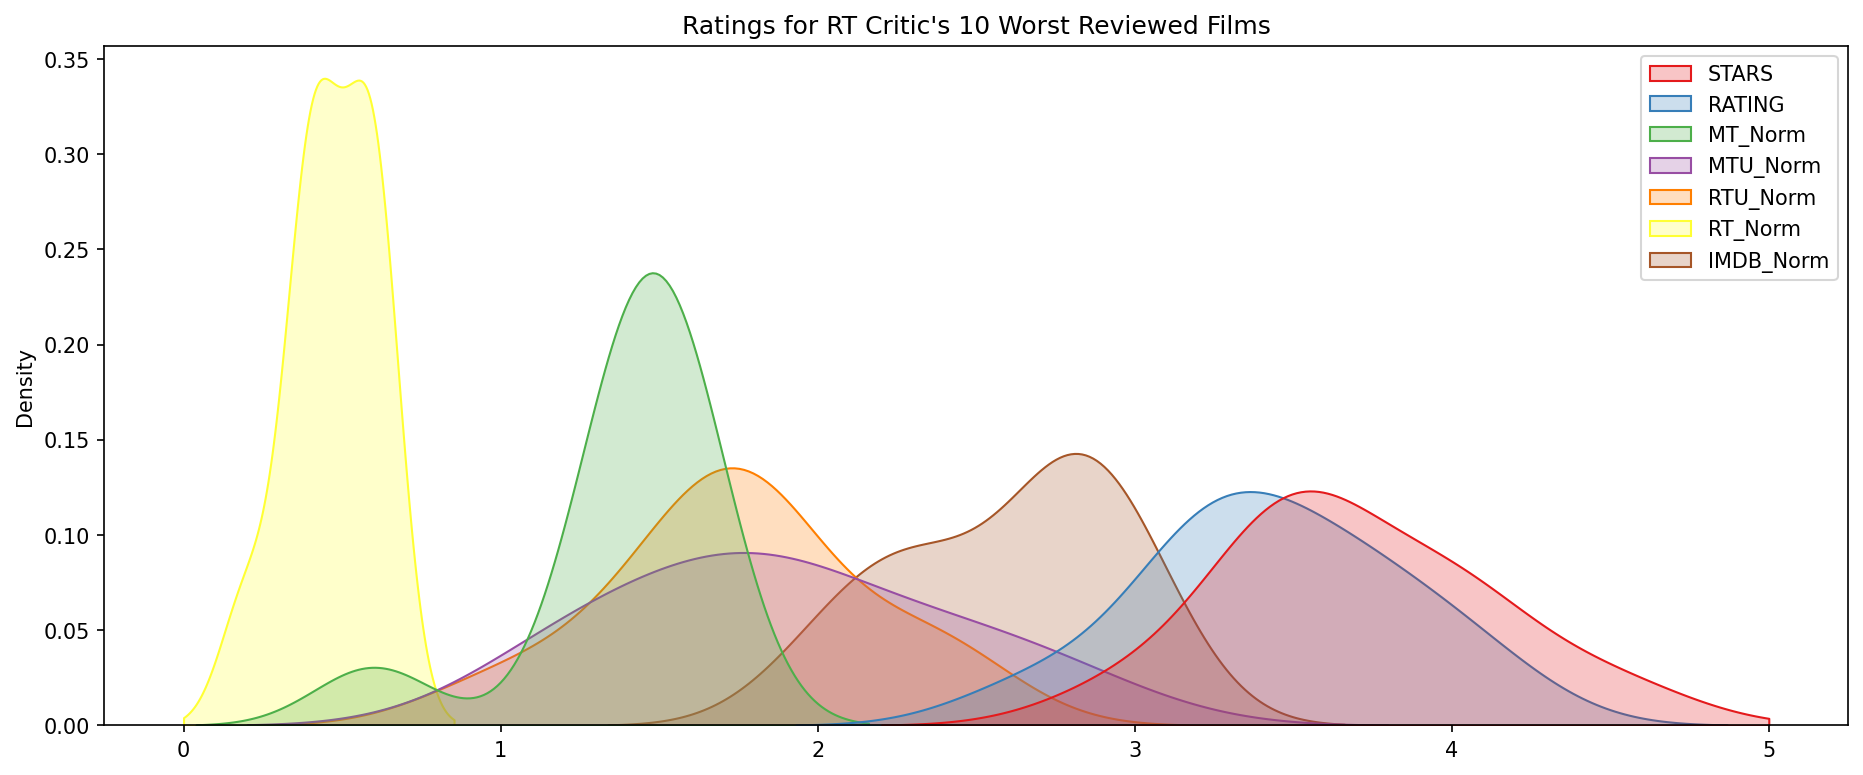

In [25]:
#  Visualize the distribution of ratings across all sites for the top 10 worst movies

plt.figure(figsize=(15,6),dpi=150)
worst_films = Norm_Film.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

In [26]:
# Calculating Taken 3 Ratings

In [27]:
0.4+2.3+1.3+2.3+3

9.3

In [28]:
9.3/5

1.86

In [29]:
from sklearn.linear_model import LinearRegression
# create a feature matrix 'X' by selecting two DataFrame columns
feature_cols = ['RTU_Norm', 'RT_Norm', 'MTU_Norm', 'MT_Norm']
X = New_Merge.loc[:, feature_cols]

# create a response vector 'y' by selecting a Series
y = New_Merge['STARS']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
# Change 'random_state' value to obtain different final results
# Train model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Use the fitted model to make predictions for the testing set
y_pred = reg.predict(X_test)

learnt_df = X_test.copy(deep=True)

learnt_df.insert(loc=0,
                 column='Fandango_norm_predicted',
                 value=pd.Series(data=y_pred, index=learnt_df.index)
                )

learnt_df.insert(loc=0,
                 column='STARS',
                 value=y_test
                )

New_table = pd.merge(learnt_df, New_Merge, left_index=True, right_index=True)
New_table[['STARS_x', 'Fandango_norm_predicted', "FILM", "IMDB_Norm"]]

reg.score(X_test, y_test)

-0.05323655274847394

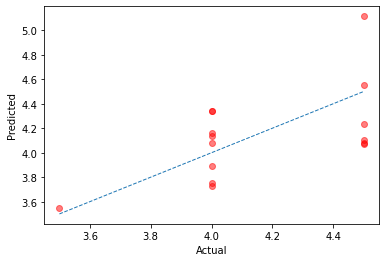

In [30]:
fig, axes = plt.subplots()

axes.scatter(y_test, y_pred, color='red', alpha=0.5)
axes.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=1)
axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')

plt.show()
plt.close()

In [31]:
# %%% Measuring the quality of the regression %%%
from scipy import stats
# Minimum of chi-squared obtained in the regression
min_chi2 = ((y_test - y_pred)**2).values

# Number of degrees of freedom for 'len(feature_cols)' parameters
n_degrees = len(y_test) - len(feature_cols)

def func_p_value(c,n):

    return (1. - stats.chi2.cdf(c, n))

# p-value
p_value = func_p_value(sum(min_chi2), n_degrees)

p_value

0.9997245306577247